# Configuration

In [1]:
# Global Configuration

import sys
sys.path.append('..')

import warnings
warnings.filterwarnings('ignore')

import jax
jax.config.update("jax_enable_x64", True)
jax.config.update("jax_debug_nans", True)

In [2]:
# Load modules

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [3]:
# Load developping modules

from models.gpr import *
from models.kernel import *
from utils.plots import *

# 1D problem

In [4]:
# Data definition

X_tr = jnp.array([-4, -3, -2, -1, 1]).reshape(-1, 1)
y_tr = jnp.sin(X_tr).ravel() + jax.random.normal(jax.random.PRNGKey(0), shape=(len(X_tr),))
y_tr = y_tr.reshape(-1, 1)

X = jnp.linspace(-5, 5, 50).reshape(-1, 1)

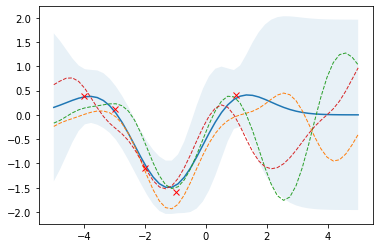

In [5]:
# Without optimization

m = GPRegressor(Kernel(rbf_kn, [1, 1])).fit(X_tr, y_tr, sgm_y=0.1)
mu, cov = m.predict(X)

samples = np.random.multivariate_normal(mu.ravel(), cov, 3)

plot_gp_1d(mu, cov, X, X_tr, y_tr, samples)

OptStep(params=DeviceArray([-0.34018886, -0.15744115], dtype=float64), state=ScipyMinimizeInfo(fun_val=DeviceArray(5.43890786, dtype=float64, weak_type=True), success=True, status=0, iter_num=7))
[0.71163591 0.85432709]


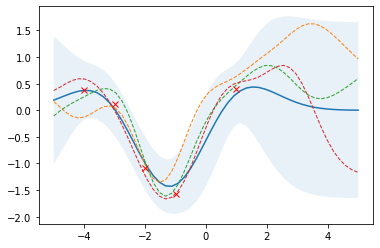

In [6]:
# With optimization

m = GPRegressor(Kernel(rbf_kn, [1., 1.])).fit(X_tr, y_tr, sgm_y=0.1)
m.optimize(verbose=False)

mu, cov = m.predict(X)
samples = np.random.multivariate_normal(mu.ravel(), cov, 3)
print(m.res)
print(m.k.ps)

plot_gp_1d(mu, cov, X, X_tr, y_tr, samples)

# 2D problem

In [7]:
# Data definition

noise_2D = 0.1

rx, ry = jnp.arange(-5, 5, 0.3), jnp.arange(-5, 5, 0.3)
gx, gy = jnp.meshgrid(rx, rx)

X_2D = np.c_[gx.ravel(), gy.ravel()]

X_2D_tr = jax.random.uniform(jax.random.PRNGKey(0), shape=(100, 2), minval=-4, maxval=4)

Y_2D_tr = jnp.sin(0.5 * jnp.linalg.norm(X_2D_tr, axis=1)) + \
             noise_2D * jax.random.normal(jax.random.PRNGKey(0), shape=(len(X_2D_tr),))
Y_2D_tr = Y_2D_tr.reshape(-1, 1)

OptStep(params=DeviceArray([-1.07045521, -1.01329592], dtype=float64), state=ScipyMinimizeInfo(fun_val=DeviceArray(6.78673595, dtype=float64, weak_type=True), success=True, status=0, iter_num=10))


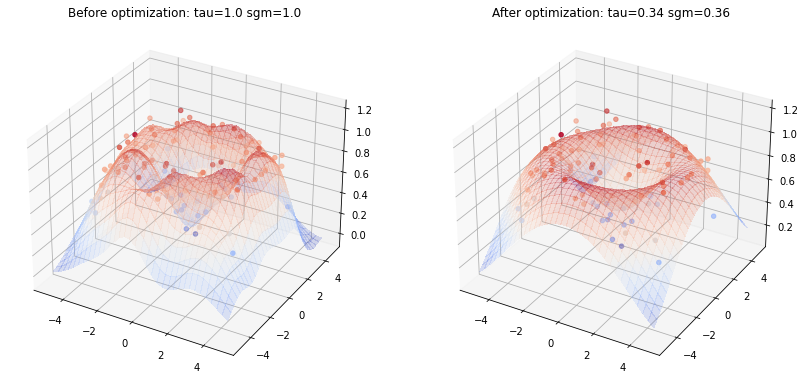

In [8]:
# High dims

plt.figure(figsize=(14,7))

## Without optimization
m = GPRegressor(Kernel(rbf_kn, [1., 1.])).fit(X_2D_tr, Y_2D_tr, sgm_y=noise_2D)
mu_s, _ = m.predict(X_2D)
plot_gp_2d(mu_s, gx, gy, X_2D_tr, Y_2D_tr, 
           f'Before optimization: tau={1.0} sgm={1.0}', 1)

## With optimization
m.optimize(verbose=False)
mu_s, _ = m.predict(X_2D)

print(m.res)
plot_gp_2d(mu_s, gx, gy, X_2D_tr, Y_2D_tr,
           f'After optimization: tau={m.k.ps[0]:.2f} sgm={m.k.ps[1]:.2f}', 2)